In [1]:
!wget http://www.robots.ox.ac.uk/~vgg/data/pets/data/images.tar.gz

--2024-02-04 20:16:26--  http://www.robots.ox.ac.uk/~vgg/data/pets/data/images.tar.gz
www.robots.ox.ac.uk (www.robots.ox.ac.uk) 해석 중... 129.67.94.2
다음으로 연결 중: www.robots.ox.ac.uk (www.robots.ox.ac.uk)|129.67.94.2|:80... 연결했습니다.
HTTP 요청을 보냈습니다. 응답 기다리는 중... 301 Moved Permanently
위치: https://www.robots.ox.ac.uk/~vgg/data/pets/data/images.tar.gz [따라감]
--2024-02-04 20:16:29--  https://www.robots.ox.ac.uk/~vgg/data/pets/data/images.tar.gz
다음으로 연결 중: www.robots.ox.ac.uk (www.robots.ox.ac.uk)|129.67.94.2|:443... 연결했습니다.
HTTP 요청을 보냈습니다. 응답 기다리는 중... 301 Moved Permanently
위치: https://thor.robots.ox.ac.uk/~vgg/data/pets/images.tar.gz [따라감]
--2024-02-04 20:16:30--  https://thor.robots.ox.ac.uk/~vgg/data/pets/images.tar.gz
thor.robots.ox.ac.uk (thor.robots.ox.ac.uk) 해석 중... 129.67.95.98
다음으로 연결 중: thor.robots.ox.ac.uk (thor.robots.ox.ac.uk)|129.67.95.98|:443... 연결했습니다.
HTTP 요청을 보냈습니다. 응답 기다리는 중... 301 Moved Permanently
위치: https://thor.robots.ox.ac.uk/datasets/pets/images.tar.gz [따라감]
--2024-02-04

In [3]:
!wget http://www.robots.ox.ac.uk/~vgg/data/pets/data/annotations.tar.gz

URL transformed to HTTPS due to an HSTS policy
--2024-02-04 20:21:35--  https://www.robots.ox.ac.uk/~vgg/data/pets/data/annotations.tar.gz
www.robots.ox.ac.uk (www.robots.ox.ac.uk) 해석 중... 129.67.94.2
다음으로 연결 중: www.robots.ox.ac.uk (www.robots.ox.ac.uk)|129.67.94.2|:443... 연결했습니다.
HTTP 요청을 보냈습니다. 응답 기다리는 중... 301 Moved Permanently
위치: https://thor.robots.ox.ac.uk/~vgg/data/pets/annotations.tar.gz [따라감]
--2024-02-04 20:21:39--  https://thor.robots.ox.ac.uk/~vgg/data/pets/annotations.tar.gz
thor.robots.ox.ac.uk (thor.robots.ox.ac.uk) 해석 중... 129.67.95.98
다음으로 연결 중: thor.robots.ox.ac.uk (thor.robots.ox.ac.uk)|129.67.95.98|:443... 연결했습니다.
HTTP 요청을 보냈습니다. 응답 기다리는 중... 301 Moved Permanently
위치: https://thor.robots.ox.ac.uk/datasets/pets/annotations.tar.gz [따라감]
--2024-02-04 20:21:41--  https://thor.robots.ox.ac.uk/datasets/pets/annotations.tar.gz
thor.robots.ox.ac.uk에 기존 연결 재활용:443.
HTTP 요청을 보냈습니다. 응답 기다리는 중... 200 OK
길이: 19173078 (18M) [application/octet-stream]
저장 위치: ‘annotations.tar.gz’


In [4]:
!tar -xf images.tar.gz
!tar -xf annotations.tar.gz

In [1]:
import os

input_dir = "images/"
target_dir = "annotations/trimaps/"

input_img_paths = sorted(
    [os.path.join(input_dir, fname)
     for fname in os.listdir(input_dir)
     if fname.endswith(".jpg")]
)

target_paths = sorted(
    [os.path.join(target_dir, fname)
     for fname in os.listdir(target_dir)
     if fname.endswith(".png") and not fname.startswith(".")]
)

2024-02-05 21:02:10.295367: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-02-05 21:02:10.330454: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-05 21:02:10.330488: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-05 21:02:10.331300: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-05 21:02:10.336784: I tensorflow/core/platform/cpu_feature_guar

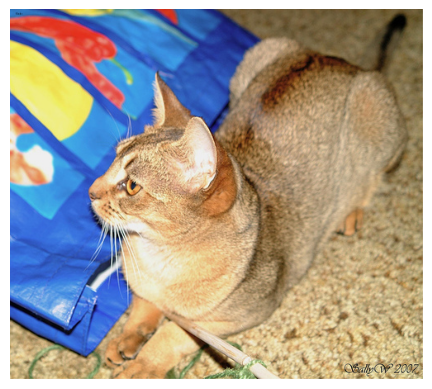

In [2]:
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array

plt.axis("off")
plt.imshow(load_img(input_img_paths[9]))

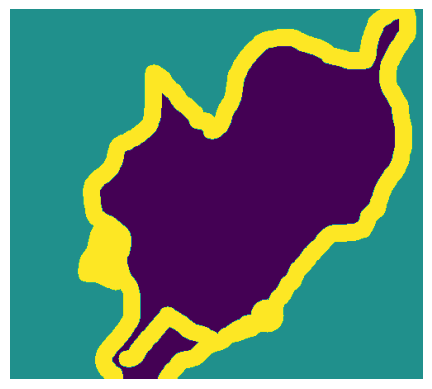

In [3]:
def display_target(target_array):
    normalized_array = (target_array.astype("uint8") - 1) * 127
    plt.axis("off")
    plt.imshow(normalized_array[:, :, 0])
    
img = img_to_array(load_img(target_paths[9], color_mode="grayscale"))
display_target(img)

In [4]:
import numpy as np
import random

img_size = (200, 200)
num_imgs = len(input_img_paths)

random.Random(1337).shuffle(input_img_paths)
random.Random(1337).shuffle(target_paths)

def path_to_input_image(path):
    return img_to_array(load_img(path, target_size=img_size))
def path_to_target(path):
    img = img_to_array(load_img(path, target_size=img_size, color_mode="grayscale"))
    img = img.astype("uint8") - 1
    return img

# 전체 이미지를 input_imgs에 float32 배열로 로드하고 타깃 마스크는 순서를 유지한 채 targets에 uint8로 로드한다
input_imgs = np.zeros((num_imgs, ) + img_size + (3, ), dtype="float32")
targets = np.zeros((num_imgs, ) + img_size + (1, ), dtype="uint8")
for i in range(num_imgs):
    input_imgs[i] = path_to_input_image(input_img_paths[i])
    targets[i] = path_to_target(target_paths[i])
    
num_val_samples = 1000
train_input_imgs = input_imgs[:-num_val_samples]
train_targets = targets[:-num_val_samples]
val_input_imgs = input_imgs[-num_val_samples:]
val_targets = targets[-num_val_samples:]

In [5]:
from tensorflow import keras
from tensorflow.keras import layers

def get_model(img_size, num_classes):
    inputs = keras.Input(shape=img_size + (3, ))
    x = layers.Rescaling(1./255)(inputs)
    # 패딩이 특성 맵 크기에 영향을 미치지 않도록 padding="same"으로 설정한다
    x = layers.Conv2D(64, 3, strides=2, activation="relu", padding="same")(x)
    x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)
    x = layers.Conv2D(128, 3, strides=2, activation="relu", padding="same")(x)
    x = layers.Conv2D(128, 3, activation="relu", padding="same")(x)
    x = layers.Conv2D(256, 3, strides=2, padding="same", activation="relu")(x)
    x = layers.Conv2D(256, 3, activation="relu", padding="same")(x)
    
    x = layers.Conv2DTranspose(256, 3, activation="relu", padding="same")(x)
    x = layers.Conv2DTranspose(256, 3, activation="relu", padding="same", strides=2)(x)
    x = layers.Conv2DTranspose(128, 3, activation="relu", padding="same")(x)
    x = layers.Conv2DTranspose(128, 3, activation="relu", padding="same", strides=2)(x)
    x = layers.Conv2DTranspose(64, 3, activation="relu", padding="same")(x)
    x = layers.Conv2DTranspose(64, 3, activation="relu", padding="same", strides=2)(x)
    
    # 각 출력 픽셀을 3개의 범주 중 하나로 분류하기 위해 3개의 필터와 소프트맥스 활성화 함수를 가진 Conv2D 층으로 모델을 종료한다
    outputs = layers.Conv2D(num_classes, 3, activation="softmax", padding="same")(x)
    
    model = keras.Model(inputs, outputs)
    return model

model = get_model(img_size=img_size, num_classes=3)
model.summary()

2024-02-05 21:02:38.592883: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-02-05 21:02:38.620472: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-02-05 21:02:38.620660: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 200, 200, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 200, 200, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 100, 100, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 100, 100, 64)      36928     
                                                                 
 conv2d_2 (Conv2D)           (None, 50, 50, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 50, 50, 128)       147584    
                                                                 
 conv2d_4 (Conv2D)           (None, 25, 25, 256)       295168

In [6]:
model.compile(optimizer="rmsprop", loss="sparse_categorical_crossentropy")
callbacks = [
    keras.callbacks.ModelCheckpoint("fast_oxford_segmentation.keras", save_best_only=True)
]
history = model.fit(train_input_imgs, train_targets,
                    epochs=50,
                    callbacks=callbacks,
                    batch_size=64,
                    validation_data=(val_input_imgs, val_targets))

Epoch 1/50


2024-02-05 21:02:45.838527: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8907
2024-02-05 21:02:57.588952: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f46488d4ff0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-02-05 21:02:57.588984: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3060, Compute Capability 8.6
2024-02-05 21:02:57.605938: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1707134577.668276   58374 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


100/100 [==============================] - 84s 583ms/step - loss: 0.9354 - val_loss: 0.8741
Epoch 2/50
100/100 [==============================] - 32s 323ms/step - loss: 0.8754 - val_loss: 0.8146
Epoch 3/50
100/100 [==============================] - 32s 323ms/step - loss: 0.8315 - val_loss: 0.8003
Epoch 4/50
100/100 [==============================] - 32s 322ms/step - loss: 0.8088 - val_loss: 0.8525
Epoch 5/50
100/100 [==============================] - 32s 324ms/step - loss: 0.7814 - val_loss: 0.7358
Epoch 6/50
100/100 [==============================] - 32s 323ms/step - loss: 0.7732 - val_loss: 0.7552
Epoch 7/50
100/100 [==============================] - 32s 323ms/step - loss: 0.7512 - val_loss: 0.8172
Epoch 8/50
100/100 [==============================] - 32s 324ms/step - loss: 0.7353 - val_loss: 0.6781
Epoch 9/50
100/100 [==============================] - 32s 323ms/step - loss: 0.7239 - val_loss: 0.6954
Epoch 10/50
100/100 [==============================] - 32s 324ms/step - loss: 0.6981

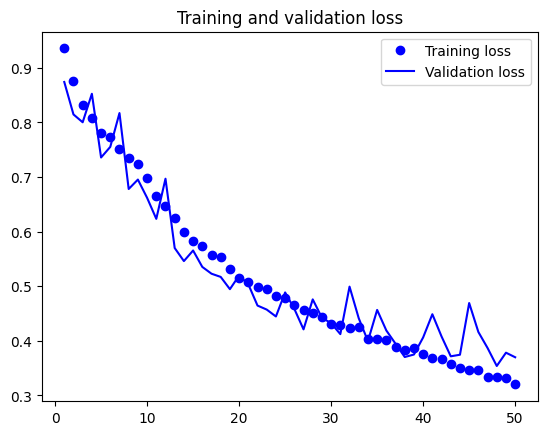

In [7]:
epochs = range(1, len(history.history["loss"]) + 1)
loss = history.history["loss"]
val_loss = history.history["val_loss"]

plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()

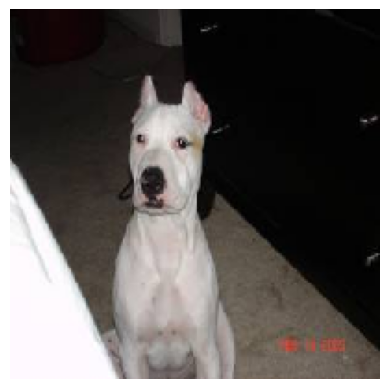

In [8]:
from tensorflow.keras.utils import array_to_img

model = keras.models.load_model("fast_oxford_segmentation.keras")

i = 4
test_image = val_input_imgs[i]
plt.axis("off")
plt.imshow(array_to_img(test_image))

1/1 [==============================] - 1s 823ms/step


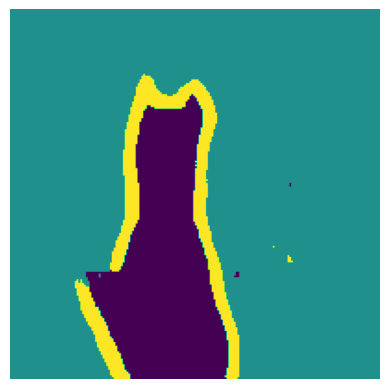

In [9]:
mask = model.predict(np.expand_dims(test_image, 0))[0]

def display_mask(pred):
    mask = np.argmax(pred, axis=-1)
    mask *= 127
    plt.axis("off")
    plt.imshow(mask)

display_mask(mask)

In [10]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(32, 32, 3))
x = layers.Conv2D(32, 3, activation="relu")(inputs)
residual = x
x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)
residual = layers.Conv2D(64, 1)(residual)
x = layers.add([x, residual])

In [11]:
inputs = keras.Input(shape=(32, 32, 3))
x = layers.Conv2D(32, 3, activation="relu")(inputs)
residual = x
x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)
x = layers.MaxPooling2D(2, padding="same")(x)
residual = layers.Conv2D(64, 1, strides=2)(residual)
x = layers.add([x, residual])

In [12]:
inputs = keras.Input(shape=(32, 32, 3))
x = layers.Rescaling(1./255)(inputs)

def residual_block(x, filters, pooling=False):
    residual = x
    x = layers.Conv2D(filters, 3, activation="relu", padding="same")(x)
    x = layers.Conv2D(filters, 3, activation="relu", padding="same")(x)
    if pooling:
        x = layers.MaxPooling2D(2, padding="same")(x)
        residual = layers.Conv2D(filters, 1, strides=2)(residual)
    elif filters != residual.shape[-1]:
        residual = layers.Conv2D(filters, 1)(residual)
    x = layers.add([x, residual])
    return x

x = residual_block(x, filters=32, pooling=True)
x = residual_block(x, filters=64, pooling=True)
x = residual_block(x, filters=128, pooling=False)

x = layers.GlobalAveragePooling2D()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 32, 32, 3)]          0         []                            
                                                                                                  
 rescaling_1 (Rescaling)     (None, 32, 32, 3)            0         ['input_4[0][0]']             
                                                                                                  
 conv2d_13 (Conv2D)          (None, 32, 32, 32)           896       ['rescaling_1[0][0]']         
                                                                                                  
 conv2d_14 (Conv2D)          (None, 32, 32, 32)           9248      ['conv2d_13[0][0]']           
                                                                                            

In [ ]:
x = layers.Conv2D(32, 3, activation="relu")(x)
x = layers.BatchNormalization()(x)

In [ ]:
x = layers.Conv2D(32, 3, use_bias=False)(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x)

In [13]:
import os, shutil, pathlib

original_dir = pathlib.Path("train")
new_base_dir = pathlib.Path("cats_vs_dogs_small")

from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(180, 180),
    batch_size=32,
)

validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32,
)

test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32,
)

data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


In [15]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
# 분리 합성곱의 기본 가정은 RGB 이미지에는 맞지 않으므로 첫 번째 층은 일반적인 Conv2D이다다
x = layers.Conv2D(filters=32, kernel_size=5, use_bias=False)(x)

for size in [32, 64, 128, 256, 512]:
    residual = x
    
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)
    x = layers.SeparableConv2D(size, 3, padding="same", use_bias=False)(x)
    
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)
    x = layers.SeparableConv2D(size, 3, padding="same", use_bias=False)(x)
    
    x = layers.MaxPooling2D(3, strides=2, padding="same")(x)
    
    residual = layers.Conv2D(size, 1, strides=2, padding="same", use_bias=False)(residual)
    
    x = layers.add([x, residual])
    
# Flatten 층 대신 GlobalAveragePooling2D 층을 사용한다
x = layers.GlobalAveragePooling2D()(x)
# 규제를 위해 드롭아웃 층을 사용한다
x = layers.Dropout(0.5)(x)

outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation.keras",
        save_best_only=True,
        monitor="val_loss",
    )
]

history = model.fit(
    train_dataset,
    epochs=100,
    validation_data=validation_dataset,
    callbacks=callbacks,
)

Epoch 1/100
63/63 [==============================] - 23s 179ms/step - loss: 0.6974 - accuracy: 0.5635 - val_loss: 0.6939 - val_accuracy: 0.5000
Epoch 2/100
63/63 [==============================] - 6s 90ms/step - loss: 0.6601 - accuracy: 0.6055 - val_loss: 0.7014 - val_accuracy: 0.5000
Epoch 3/100
63/63 [==============================] - 6s 89ms/step - loss: 0.6410 - accuracy: 0.6090 - val_loss: 0.6993 - val_accuracy: 0.5000
Epoch 4/100
63/63 [==============================] - 6s 90ms/step - loss: 0.6290 - accuracy: 0.6550 - val_loss: 0.7005 - val_accuracy: 0.5000
Epoch 5/100
63/63 [==============================] - 6s 89ms/step - loss: 0.6079 - accuracy: 0.6765 - val_loss: 0.6969 - val_accuracy: 0.5010
Epoch 6/100
63/63 [==============================] - 6s 90ms/step - loss: 0.5992 - accuracy: 0.6860 - val_loss: 0.8095 - val_accuracy: 0.5000
Epoch 7/100
63/63 [==============================] - 6s 92ms/step - loss: 0.5810 - accuracy: 0.7065 - val_loss: 0.7581 - val_accuracy: 0.5040
Epoc

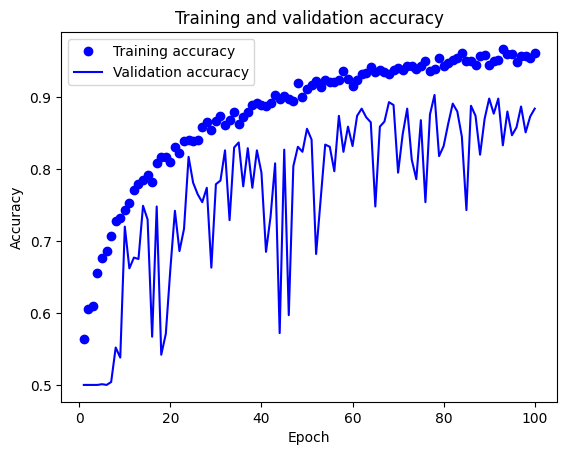

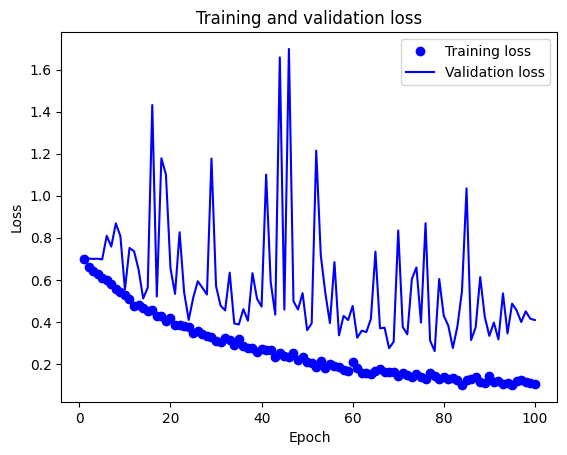

In [16]:
import matplotlib.pyplot as plt

accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)

plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [17]:
test_model = keras.models.load_model("mini_Xception.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"테스트 정확도: {test_acc:.3f}")

63/63 [==============================] - 3s 34ms/step - loss: 0.3207 - accuracy: 0.8905
테스트 정확도: 0.891


In [18]:
from tensorflow import keras
model = keras.models.load_model("convnet_from_scratch_with_augmentation.keras")
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 180, 180, 3)       0         
                                                                 
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_5 (Conv2D)           (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 89, 89, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 87, 87, 64)        18496     
                                                           

In [6]:
from tensorflow import keras
import numpy as np

img_path = keras.utils.get_file(
    fname="cat.jpg",
    origin="https://img-datasets.s3.amazonaws.com/cat.jpg",
)

def get_img_array(img_path, target_size):
    img = keras.utils.load_img(img_path, target_size=target_size)
    array = keras.utils.img_to_array(img)
    array = np.expand_dims(array, axis=0)
    return array

img_tensor = get_img_array(img_path, target_size=(180, 180))

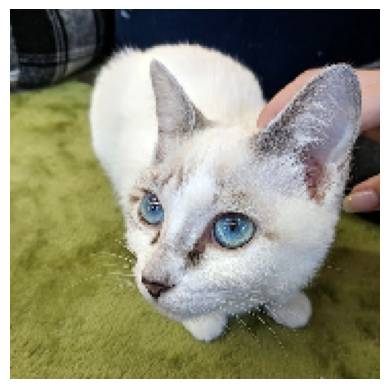

In [20]:
import matplotlib.pyplot as plt

plt.axis("off")
plt.imshow(img_tensor[0].astype("uint8"))
plt.show()

In [21]:
from tensorflow.keras import layers

layer_outputs = []
layer_names = []
for layer in model.layers:
    if isinstance(layer, (layers.Conv2D, layers.MaxPooling2D)):
        layer_outputs.append(layer.output)
        layer_names.append(layer.name)
activation_model = keras.Model(inputs=model.input, outputs=layer_outputs)

In [22]:
activations = activation_model.predict(img_tensor)

1/1 [==============================] - 0s 306ms/step


In [23]:
first_layer_activation = activations[0]
print(first_layer_activation.shape)

(1, 178, 178, 32)


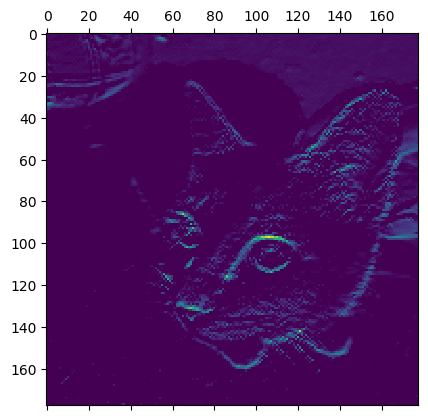

In [25]:
import matplotlib.pyplot as plt

plt.matshow(first_layer_activation[0, :, :, 4], cmap="viridis")
plt.show()

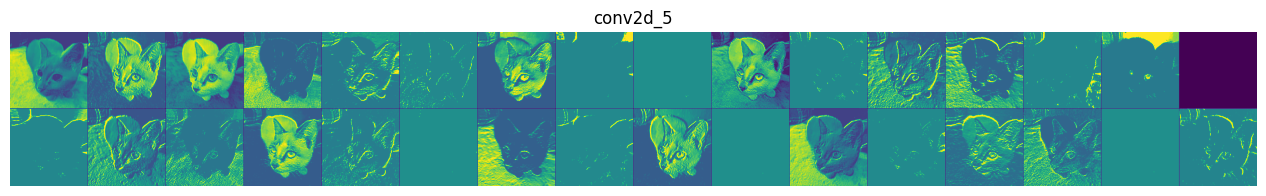

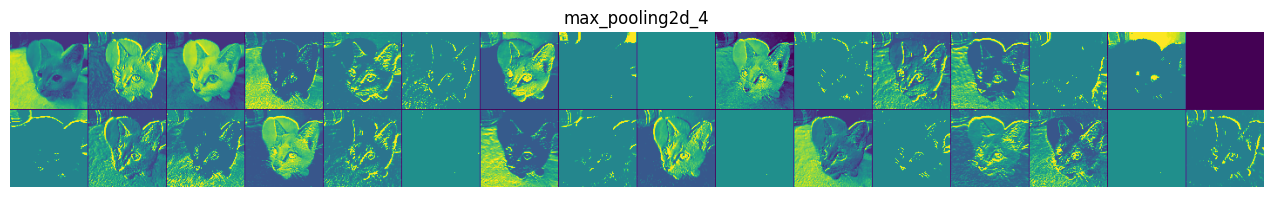

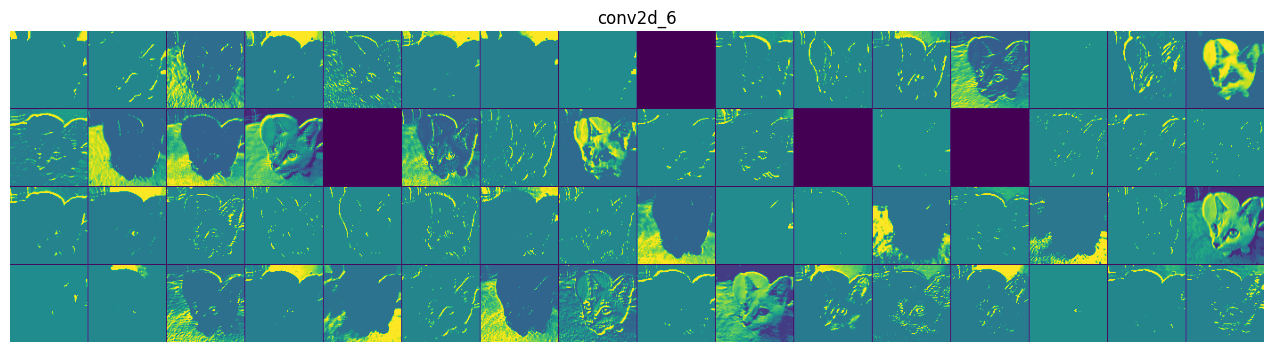

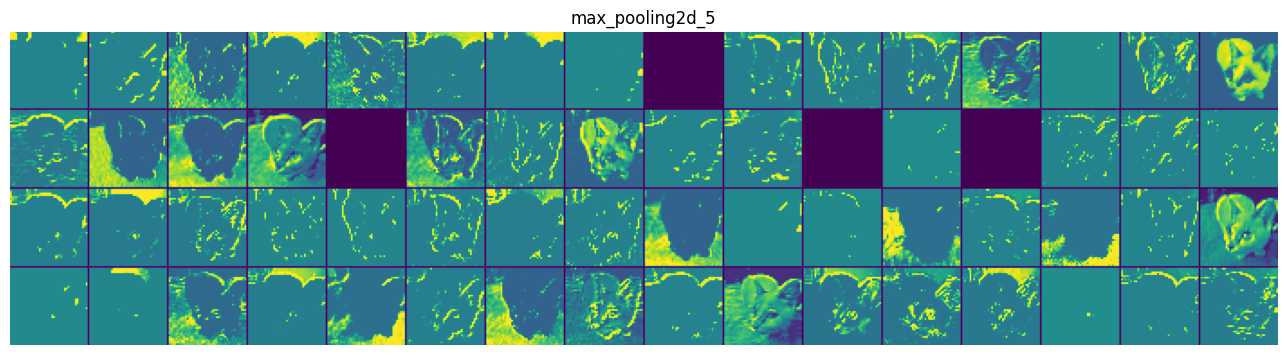

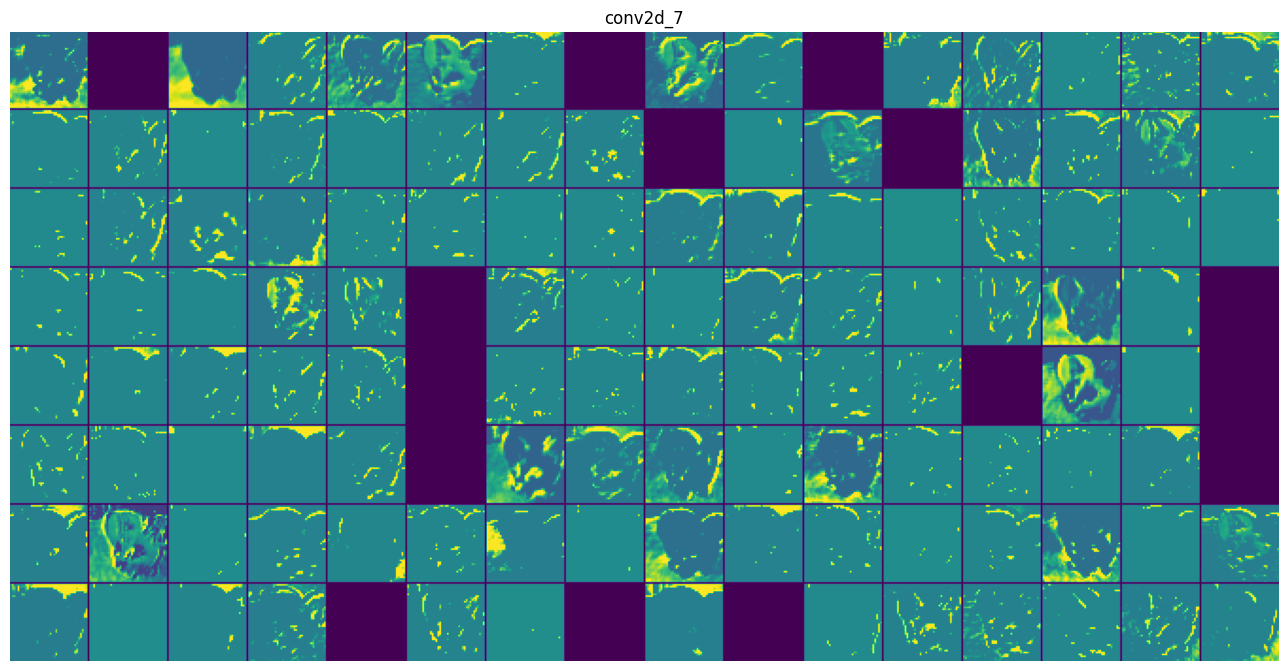

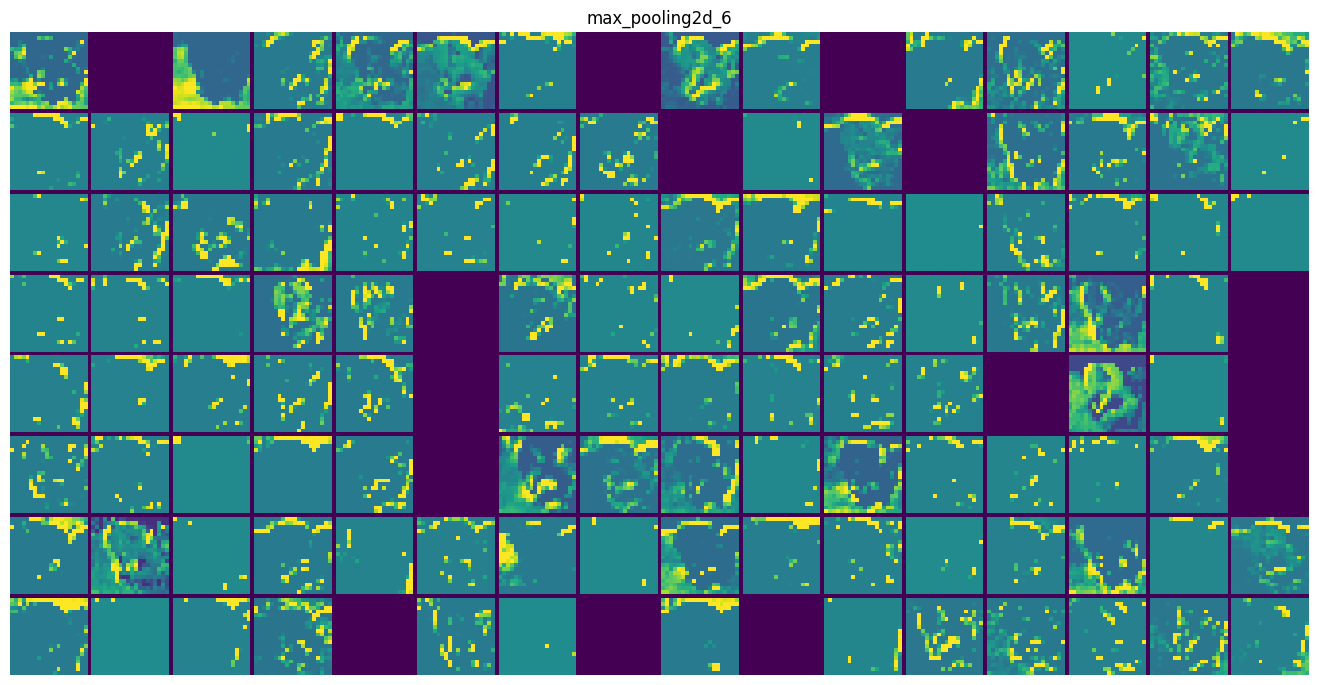

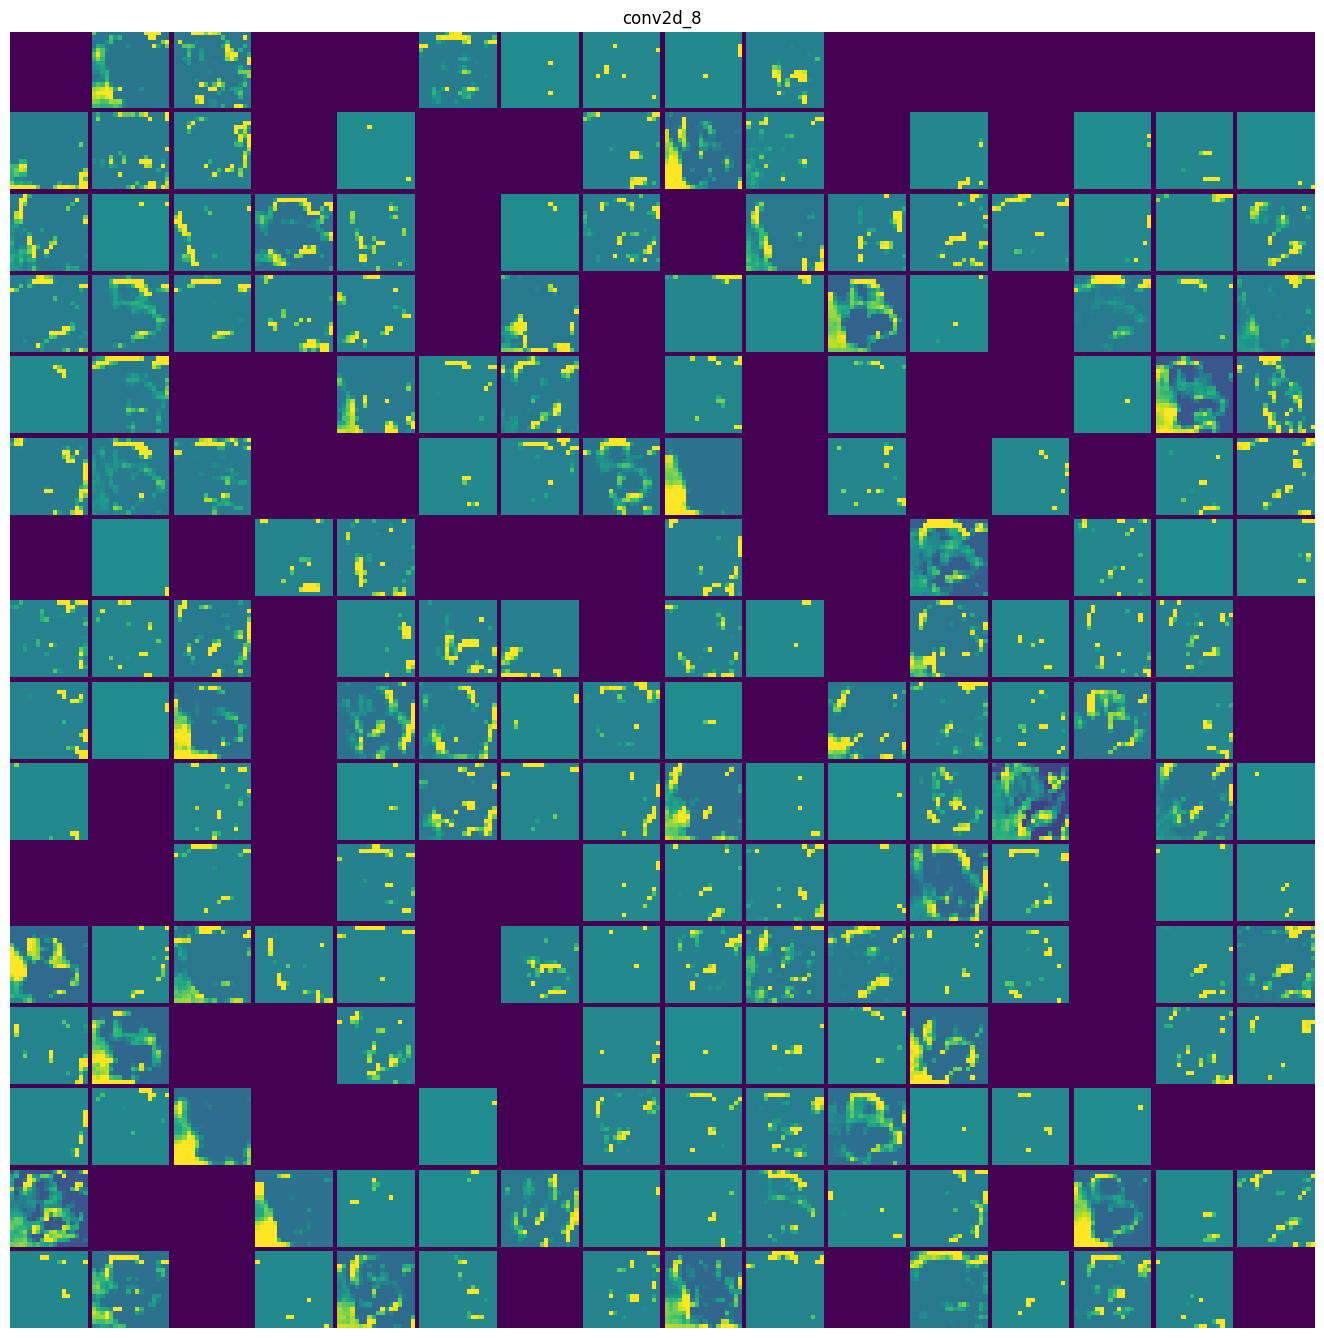

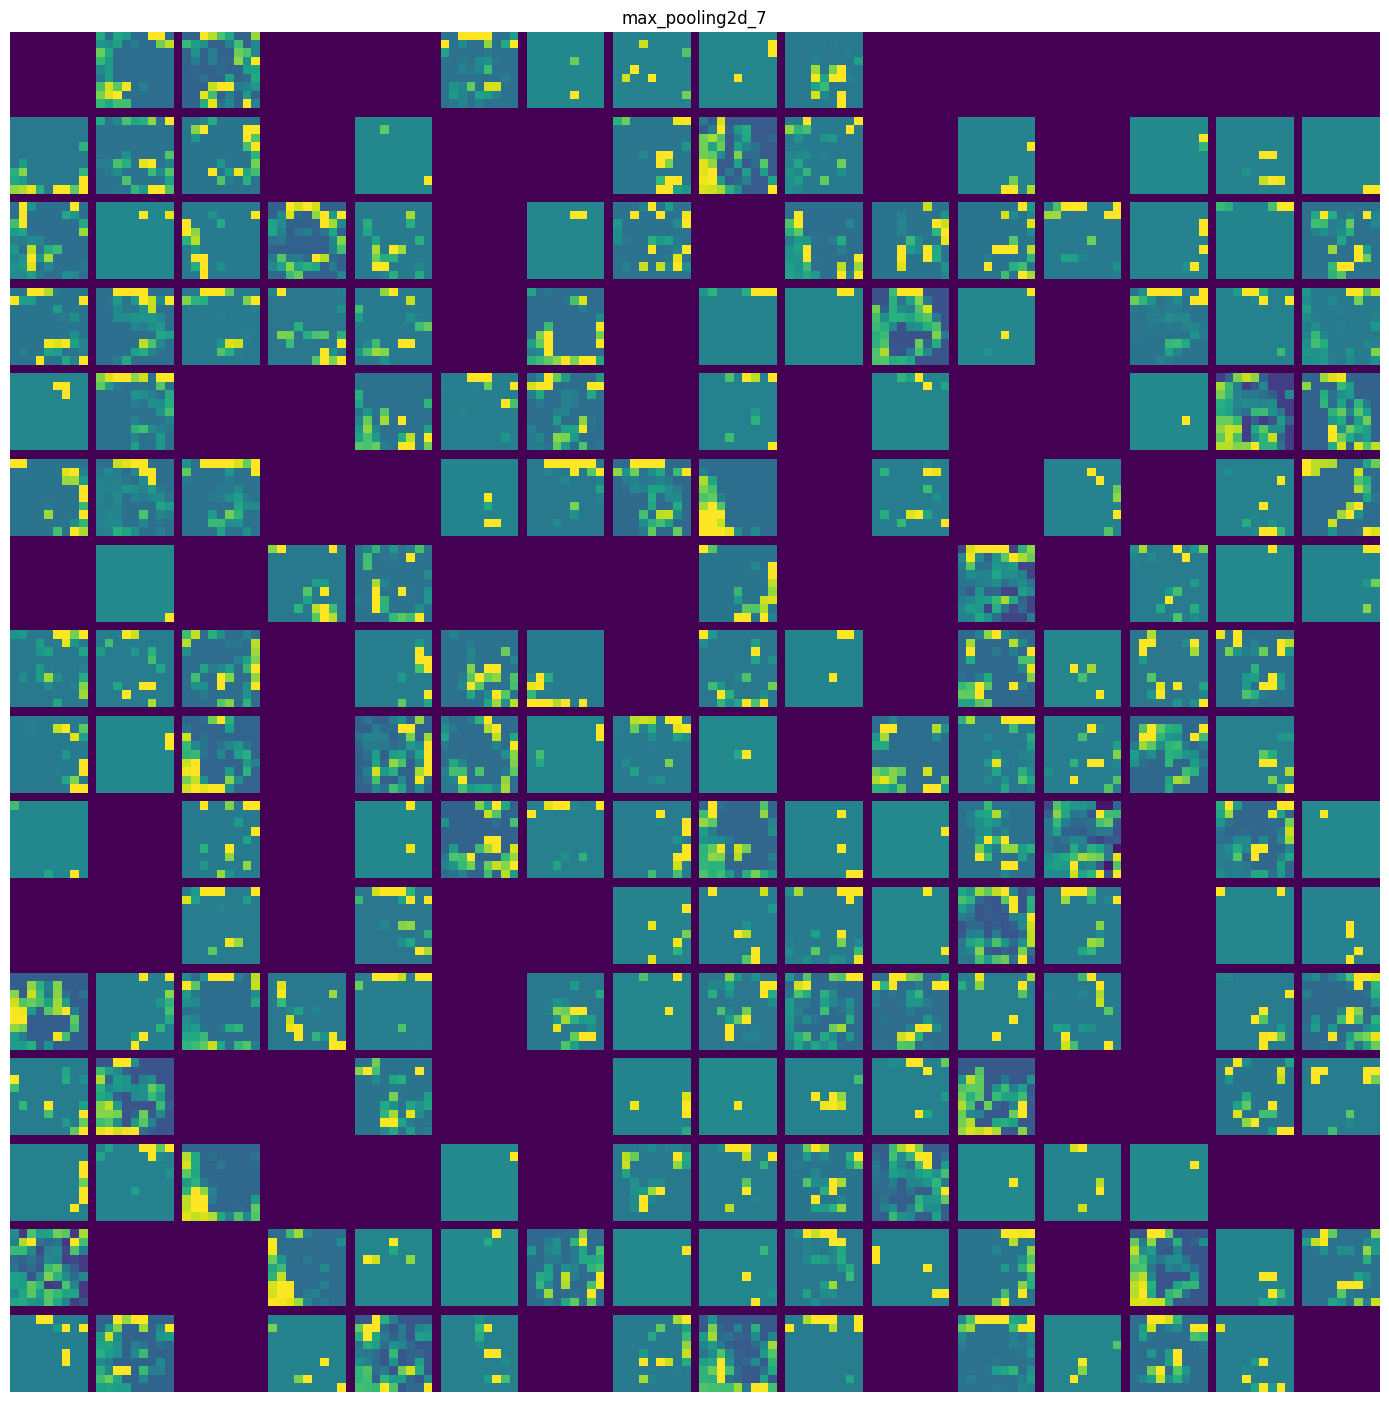

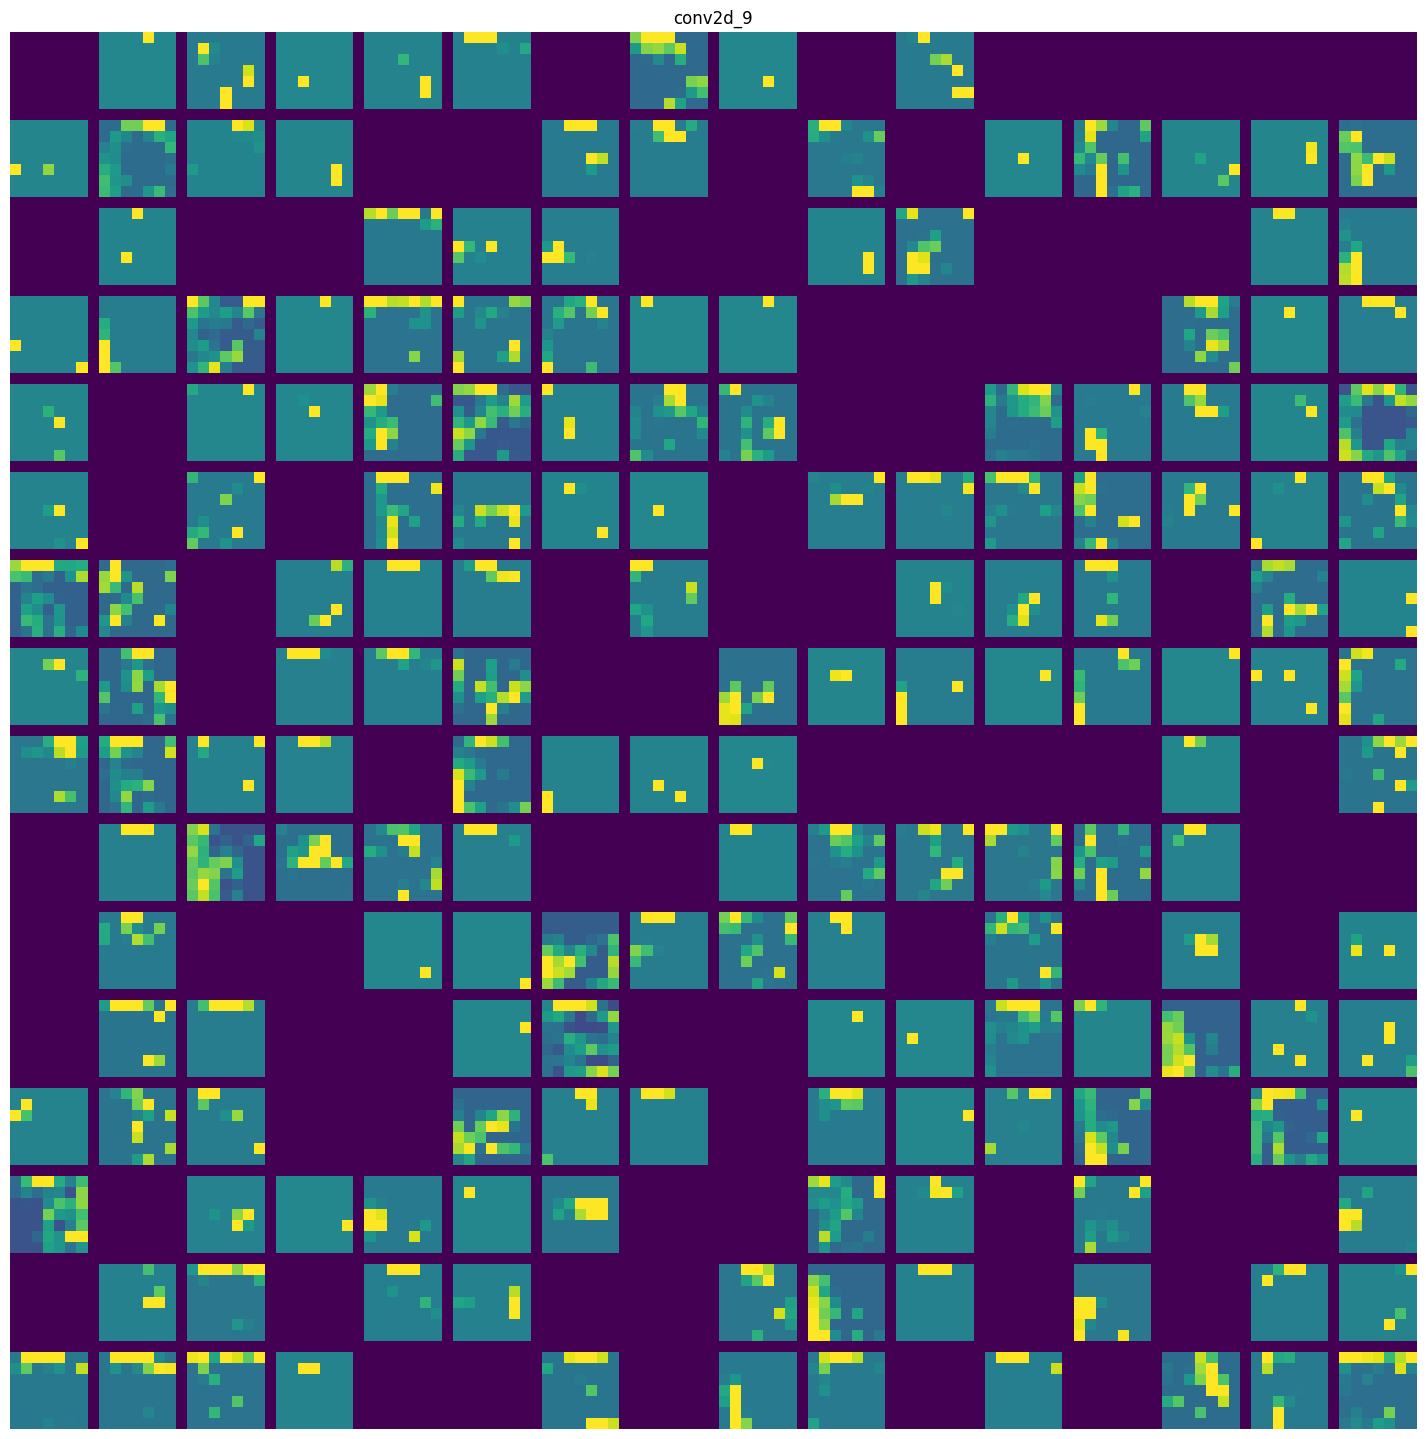

In [27]:
images_per_row = 16
for layer_name, layer_activation in zip(layer_names, activations):
    n_features = layer_activation.shape[-1]
    size = layer_activation.shape[1]
    n_cols = n_features // images_per_row
    display_grid = np.zeros(((size + 1) * n_cols - 1, images_per_row * (size + 1) - 1))
    
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_index = col * images_per_row + row
            channel_image = layer_activation[0, :, :, channel_index].copy()
            if channel_image.sum() != 0:
                channel_image -= channel_image.mean()
                channel_image /= channel_image.std()
                channel_image *= 64
                channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype("uint8")
            display_grid[
                col * (size + 1): (col + 1) * size + col,
                row * (size + 1): (row + 1) * size + row
            ] = channel_image
    scale = 1. / size

    plt.figure(figsize=(scale * display_grid.shape[1], scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.axis("off")
    plt.imshow(display_grid, aspect="auto", cmap="viridis")

In [3]:
from tensorflow import keras
from tensorflow.keras import layers

In [4]:
model = keras.applications.xception.Xception(
    weights="imagenet",
    include_top=False,
)

2024-02-08 21:33:36.251490: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:274] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


In [3]:
for layer in model.layers:
    if isinstance(layer, (keras.layers.Conv2D, keras.layers.SeparableConv2D)):
        print(layer.name)

block1_conv1
block1_conv2
block2_sepconv1
block2_sepconv2
conv2d
block3_sepconv1
block3_sepconv2
conv2d_1
block4_sepconv1
block4_sepconv2
conv2d_2
block5_sepconv1
block5_sepconv2
block5_sepconv3
block6_sepconv1
block6_sepconv2
block6_sepconv3
block7_sepconv1
block7_sepconv2
block7_sepconv3
block8_sepconv1
block8_sepconv2
block8_sepconv3
block9_sepconv1
block9_sepconv2
block9_sepconv3
block10_sepconv1
block10_sepconv2
block10_sepconv3
block11_sepconv1
block11_sepconv2
block11_sepconv3
block12_sepconv1
block12_sepconv2
block12_sepconv3
block13_sepconv1
block13_sepconv2
conv2d_3
block14_sepconv1
block14_sepconv2


In [5]:
layer_name = "block3_sepconv1"
layer = model.get_layer(name=layer_name)
feature_extractor = keras.Model(inputs=model.input, outputs=layer.output)

In [7]:
activation = feature_extractor(keras.applications.xception.preprocess_input(img_tensor))

2024-02-07 19:44:53.095198: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8907


In [2]:
import tensorflow as tf

def compute_loss(image, filter_index):
    activation = feature_extractor(image)
    filter_activation = activation[:, 2:-2, 2:-2, filter_index]
    return tf.reduce_mean(filter_activation)

2024-02-08 21:33:25.149148: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-02-08 21:33:25.281658: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-08 21:33:25.281709: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-08 21:33:25.297819: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-08 21:33:25.337293: I tensorflow/core/platform/cpu_feature_guar

In [9]:
@tf.function
def gradient_ascent_step(image, filter_index, learning_rate):
    with tf.GradientTape() as tape:
        tape.watch(image)
        loss = compute_loss(image, filter_index)
    grads = tape.gradient(loss, image)
    grads = tf.math.l2_normalize(grads)
    image += learning_rate * grads
    return image

In [10]:
img_width = 200
img_height = 200

def generate_filter_pattern(filter_index):
    iterations = 30
    learning_rate = 10.
    image = tf.random.uniform(
        minval = 0.4,
        maxval = 0.6,
        shape=(1, img_width, img_height, 3),
    )
    for i in range(iterations):
        image = gradient_ascent_step(image, filter_index, learning_rate)
    return image[0].numpy()

In [11]:
def deprocess_image(image):
    image -= image.mean()
    image /= image.std()
    image *= 64
    image += 128
    image = np.clip(image, 0, 255).astype("uint8")
    image = image[25:-25, 25:-25, :]
    return image

In [1]:
import matplotlib.pyplot as plt

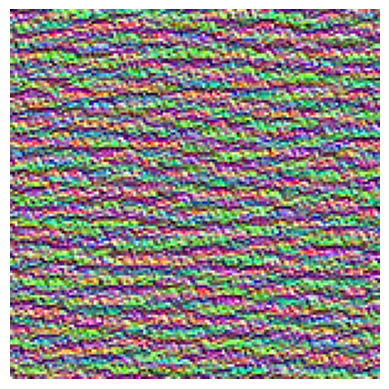

In [14]:
plt.axis("off")
plt.imshow(deprocess_image(generate_filter_pattern(filter_index=2)))
plt.show()

In [15]:
all_images = []
for filter_index in range(64):
    print(f"{filter_index}번 필터 처리 중")
    image = deprocess_image(generate_filter_pattern(filter_index))
    all_images.append(image)
    
margin = 5
n = 8
cropped_width = img_width - 25 * 2
cropped_height = img_height - 25 * 2
width = n * cropped_width + (n - 1) * margin
height = n * cropped_height + (n - 1) * margin
stitched_filters = np.zeros((width, height, 3))

for i in range(n):
    for j in range(n):
        image = all_images[i * n + j]
        stitched_filters[
            (cropped_width + margin) * i : (cropped_width + margin) * i + cropped_width,
            (cropped_height + margin) * j : (cropped_height + margin) * j + cropped_height,
            :,
        ] = image
        
keras.utils.save_img(f"filters/filters_for_layer_{layer_name}.png", stitched_filters)

0번 필터 처리 중
1번 필터 처리 중
2번 필터 처리 중
3번 필터 처리 중
4번 필터 처리 중
5번 필터 처리 중
6번 필터 처리 중
7번 필터 처리 중
8번 필터 처리 중
9번 필터 처리 중
10번 필터 처리 중
11번 필터 처리 중
12번 필터 처리 중
13번 필터 처리 중
14번 필터 처리 중
15번 필터 처리 중
16번 필터 처리 중
17번 필터 처리 중
18번 필터 처리 중
19번 필터 처리 중
20번 필터 처리 중
21번 필터 처리 중
22번 필터 처리 중
23번 필터 처리 중
24번 필터 처리 중
25번 필터 처리 중
26번 필터 처리 중
27번 필터 처리 중
28번 필터 처리 중
29번 필터 처리 중
30번 필터 처리 중
31번 필터 처리 중
32번 필터 처리 중
33번 필터 처리 중
34번 필터 처리 중
35번 필터 처리 중
36번 필터 처리 중
37번 필터 처리 중
38번 필터 처리 중
39번 필터 처리 중
40번 필터 처리 중
41번 필터 처리 중
42번 필터 처리 중
43번 필터 처리 중
44번 필터 처리 중
45번 필터 처리 중
46번 필터 처리 중
47번 필터 처리 중
48번 필터 처리 중
49번 필터 처리 중
50번 필터 처리 중
51번 필터 처리 중
52번 필터 처리 중
53번 필터 처리 중
54번 필터 처리 중
55번 필터 처리 중
56번 필터 처리 중
57번 필터 처리 중
58번 필터 처리 중
59번 필터 처리 중
60번 필터 처리 중
61번 필터 처리 중
62번 필터 처리 중
63번 필터 처리 중


In [7]:
import numpy as np

In [8]:
model = keras.applications.xception.Xception(weights="imagenet")

In [9]:
img_path = keras.utils.get_file(
    fname="elephant.jpg",
    origin="https://img-datasets.s3.amazonaws.com/elephant.jpg"
)

def get_img_array(img_path, target_size):
    img = keras.utils.load_img(img_path, target_size=target_size)
    array = keras.utils.img_to_array(img)
    array = np.expand_dims(array, axis=0)
    array = keras.applications.xception.preprocess_input(array)
    return array

img_array = get_img_array(img_path, target_size=(299, 299))

In [11]:
preds = model.predict(img_array)
print(keras.applications.xception.decode_predictions(preds, top=3)[0])

1/1 [==============================] - 0s 102ms/step
[('n02504458', 'African_elephant', 0.8699392), ('n01871265', 'tusker', 0.07695647), ('n02504013', 'Indian_elephant', 0.023541797)]


In [12]:
last_conv_layer_name = "block14_sepconv2_act"
classifier_layer_names = [
    "avg_pool",
    "predictions",
]
last_conv_layer = model.get_layer(last_conv_layer_name)
last_conv_layer_model = keras.Model(inputs=model.inputs, outputs=last_conv_layer.output)

In [14]:
classifier_input = keras.Input(shape=last_conv_layer.output.shape[1:])
x = classifier_input
for layer_name in classifier_layer_names:
    x = model.get_layer(layer_name)(x)
classifier_model = keras.Model(inputs=classifier_input, outputs=x)

In [15]:
import tensorflow as tf

with tf.GradientTape() as tape:
    last_conv_layer_output = last_conv_layer_model(img_array)
    tape.watch(last_conv_layer_output)
    preds = classifier_model(last_conv_layer_output)
    top_pred_index = tf.argmax(preds[0])
    top_class_channel = preds[:, top_pred_index]
    
grads = tape.gradient(top_class_channel, last_conv_layer_output)

In [16]:
pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2)).numpy()
last_conv_layer_output = last_conv_layer_output.numpy()[0]
for i in range(pooled_grads.shape[-1]):
    last_conv_layer_output[:, :, i] *= pooled_grads[i]
heatmap = np.mean(last_conv_layer_output, axis=-1)

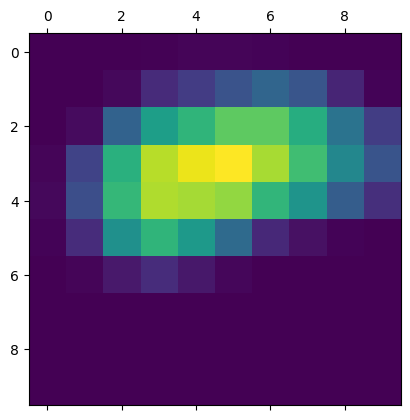

In [17]:
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
plt.matshow(heatmap)
plt.show()

In [18]:
import matplotlib.cm as cm

img = keras.utils.load_img(img_path)
img = keras.utils.img_to_array(img)
heatmap = np.uint8(255 * heatmap)

jet = cm.get_cmap("jet")
jet_colors = jet(np.arange(256))[:, :3]
jet_heatmap = jet_colors[heatmap]

jet_heatmap = keras.utils.array_to_img(jet_heatmap)
jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
jet_heatmap = keras.utils.img_to_array(jet_heatmap)

superimposed_img = jet_heatmap * 0.4 + img
superimposed_img = keras.utils.array_to_img(superimposed_img)

save_path = "elephant_cam.jpg"
superimposed_img.save(save_path)

/tmp/ipykernel_12799/2029835625.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet = cm.get_cmap("jet")
